In [8]:
import numpy as np
import matplotlib.pyplot as plt

import emcee

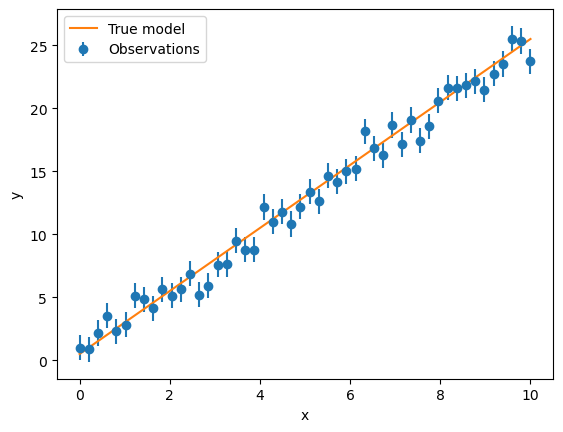

In [9]:
# 生成模拟数据
np.random.seed(42)
true_m = 2.5  # 真实的斜率
true_b = 0.5  # 真实的截距
x = np.linspace(0, 10, 50)
y_true = true_m * x + true_b
y_obs = y_true + np.random.normal(0, 1, len(x))  # 加上测量误差

# 绘制数据
plt.errorbar(x, y_obs, yerr=1.0, fmt='o', label="Observations")
plt.plot(x, y_true, label="True model")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [10]:
# 定义似然函数
def log_likelihood(theta, x, y, yerr):
    m, b = theta
    model = m * x + b
    sigma2 = yerr ** 2
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

# 定义先验分布
def log_prior(theta):
    m, b = theta
    if -5.0 < m < 5.0 and -5.0 < b < 5.0:
        return 0.0  # Uniform prior
    return -np.inf  # Return -inf for values outside the prior bounds

# 定义后验概率
def log_posterior(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)




In [14]:
# 初始化参数
nwalkers = 64  # MCMC的步数
ndim = 2  # 参数维度 (m, b)
pos = [np.array([2.0, 0.0]) + 1e-4 * np.random.randn(ndim) for i in range(nwalkers)]

# 运行MCMC采样
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(x, y_obs, 1.0))
sampler.run_mcmc(pos, 10000, progress=True)

100%|██████████████████████████████████| 10000/10000 [00:05<00:00, 1967.81it/s]


State([[2.4125721  1.03436292]
 [2.43638704 0.61591644]
 [2.4868448  0.56919918]
 [2.47689027 0.2005438 ]
 [2.46144375 0.43664368]
 [2.39188622 0.82040083]
 [2.40633792 0.78884963]
 [2.40879118 0.54284756]
 [2.4178169  0.71554388]
 [2.44466198 0.65543819]
 [2.42443652 0.43576583]
 [2.45915758 0.47448274]
 [2.44473488 0.39404234]
 [2.36992488 0.78143251]
 [2.48891536 0.24365104]
 [2.4621671  0.57749471]
 [2.37302165 0.90661371]
 [2.47853532 0.4927824 ]
 [2.42275625 0.68311195]
 [2.39429165 0.92967795]
 [2.45326191 0.47108261]
 [2.3224867  1.18613079]
 [2.38560476 0.93254078]
 [2.35160857 0.8358141 ]
 [2.49673906 0.20684831]
 [2.40468191 0.7333351 ]
 [2.4756282  0.42045721]
 [2.51084363 0.36418989]
 [2.44986912 0.52039849]
 [2.44543198 0.76636633]
 [2.40429532 0.49711851]
 [2.45044807 0.65871599]
 [2.41003602 0.8265387 ]
 [2.4060384  0.96410835]
 [2.35735096 0.94032828]
 [2.54516619 0.09018498]
 [2.4114209  0.67751892]
 [2.49216282 0.24686579]
 [2.41404802 0.76849801]
 [2.48685642 0.3529

In [15]:
# 提取采样结果
samples = sampler.get_chain(discard=100, thin=15, flat=True)

Estimated m: 2.442 ± 0.048
Estimated b: 0.564 ± 0.279


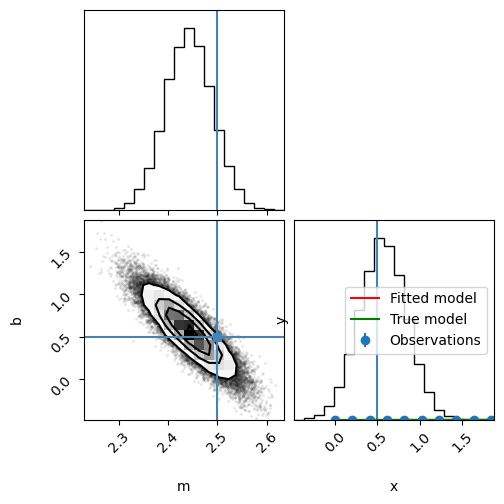

In [16]:
# 绘制采样结果
import corner
fig = corner.corner(samples, labels=["m", "b"], truths=[true_m, true_b])

# 计算参数的平均值和标准差
m_mcmc, b_mcmc = np.mean(samples, axis=0)
m_err, b_err = np.std(samples, axis=0)

print(f"Estimated m: {m_mcmc:.3f} ± {m_err:.3f}")
print(f"Estimated b: {b_mcmc:.3f} ± {b_err:.3f}")

# 绘制拟合结果
plt.errorbar(x, y_obs, yerr=1.0, fmt='o', label="Observations")
plt.plot(x, m_mcmc * x + b_mcmc, label="Fitted model", color="r")
plt.plot(x, true_m * x + true_b, label="True model", color="g")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


100%|██████████████████████████████████| 10000/10000 [00:05<00:00, 1909.40it/s]


Estimated m: 7.941 ± 0.046
Estimated b: 0.566 ± 0.268
Estimated sigma: 0.953 ± 0.101


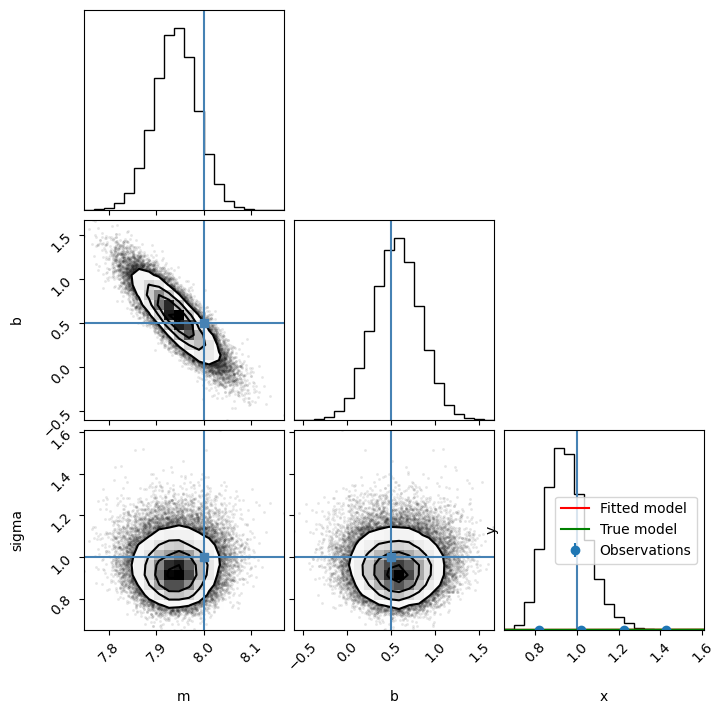

In [19]:
# 模拟数据
np.random.seed(42)
true_m = 8
true_b = 0.5
x = np.linspace(0, 10, 50)
y_true = true_m * x + true_b
y_obs = y_true + np.random.normal(0, 1, len(x))  # 加噪声

# 定义似然函数
def log_likelihood(theta, x, y):
    m, b, sigma = theta
    model = m * x + b
    sigma2 = sigma ** 2
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

# 定义先验分布
def log_prior(theta):
    m, b, sigma = theta
    if 0 < m < 10 and -1 < b < 2 and 0.1 < sigma < 10:  # 对 sigma 的先验
        return 0.0
    return -np.inf

# 定义后验概率
def log_posterior(theta, x, y):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y)

# 初始化参数
nwalkers = 64
ndim = 3  # 增加 sigma 作为第三个参数
pos = [np.array([2.5, 0.5, 1.0]) + 1e-4 * np.random.randn(ndim) for i in range(nwalkers)]

# 运行MCMC
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(x, y_obs))
sampler.run_mcmc(pos, 10000, progress=True)

# 提取采样结果
samples = sampler.get_chain(discard=1000, thin=15, flat=True)

# 绘制corner图
fig = corner.corner(samples, labels=["m", "b", "sigma"], truths=[true_m, true_b, 1.0])

# 计算参数的平均值和标准差
m_mcmc, b_mcmc, sigma_mcmc = np.mean(samples, axis=0)
m_err, b_err, sigma_err = np.std(samples, axis=0)

print(f"Estimated m: {m_mcmc:.3f} ± {m_err:.3f}")
print(f"Estimated b: {b_mcmc:.3f} ± {b_err:.3f}")
print(f"Estimated sigma: {sigma_mcmc:.3f} ± {sigma_err:.3f}")

# 绘制拟合结果
plt.errorbar(x, y_obs, yerr=sigma_mcmc, fmt='o', label="Observations")
plt.plot(x, m_mcmc * x + b_mcmc, label="Fitted model", color="r")
plt.plot(x, true_m * x + true_b, label="True model", color="g")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


/home/mengzhu/anaconda3/lib/python3.10/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]


m 的众数为: 2.0066691603740514
b 的众数为: 0.06926979273765554
log_f 的众数为: -4.426122675198827


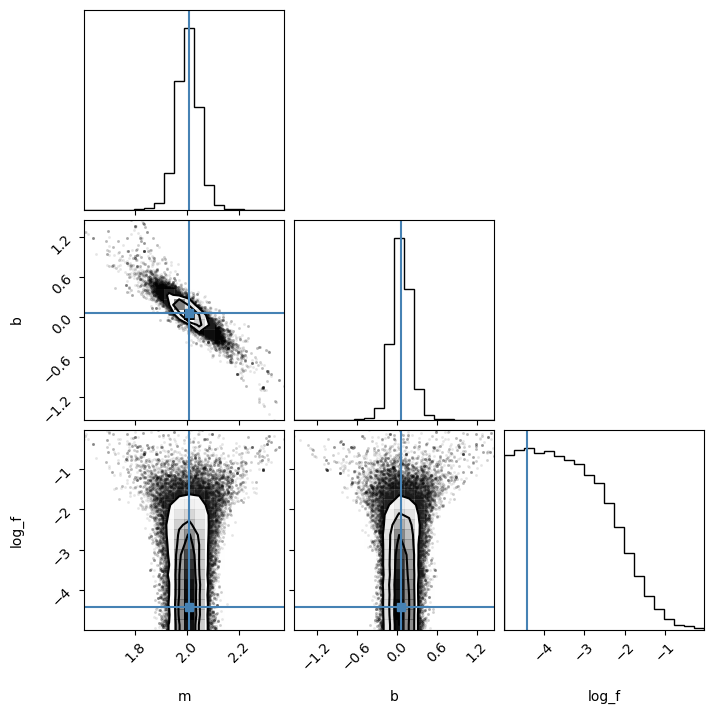

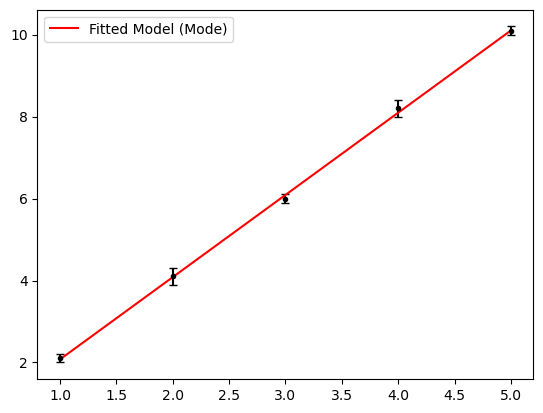

In [21]:
import numpy as np
import emcee
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import corner

# 假设已有实验数据
# 替换 [...] 为实际数据

x_data = np.array([1.0, 2.0, 3.0, 4.0, 5.0])  # 这里需要你的实际数据
y_data = np.array([2.1, 4.1, 6.0, 8.2, 10.1])  # 观测结果的实际数据
y_error = np.array([0.1, 0.2, 0.1, 0.2, 0.1])  # 每个点的观测误差


# 定义待拟合的模型，比如线性模型 y = m * x + b
def model(x, m, b):
    return m * x + b

# 定义似然函数，假设观测误差服从正态分布
def log_likelihood(theta, x, y, yerr):
    m, b, log_f = theta
    model_y = model(x, m, b)
    sigma2 = yerr**2 + np.exp(2*log_f)
    return -0.5 * np.sum((y - model_y)**2 / sigma2 + np.log(sigma2))

# 定义先验分布
def log_prior(theta):
    m, b, log_f = theta
    if -10 < m < 10 and -10 < b < 10 and -5 < log_f < 0:
        return 0.0
    return -np.inf

# 定义后验概率函数
def log_posterior(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)

# MCMC 设置
nwalkers = 32  # 采样链的数量
ndim = 3       # 参数维数 (m, b, log_f)
p0 = np.random.randn(nwalkers, ndim)  # 初始点

# 运行采样
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(x_data, y_data, y_error))
sampler.run_mcmc(p0, 5000)  # 5000步的采样

# 提取结果并进行分析
samples = sampler.chain[:, 1000:, :].reshape((-1, ndim))

# 定义计算众数的函数，使用KDE
def compute_mode(samples):
    kde = gaussian_kde(samples)
    x = np.linspace(min(samples), max(samples), 1000)  # 生成范围内的点
    kde_values = kde(x)  # 计算这些点的密度估计值
    mode_index = np.argmax(kde_values)  # 找到最大值的索引
    return x[mode_index]  # 返回众数

# 计算每个参数的众数
m_mode = compute_mode(samples[:, 0])  # m的众数
b_mode = compute_mode(samples[:, 1])  # b的众数
log_f_mode = compute_mode(samples[:, 2])  # log_f的众数

print(f"m 的众数为: {m_mode}")
print(f"b 的众数为: {b_mode}")
print(f"log_f 的众数为: {log_f_mode}")

# 绘制corner图来检查后验分布
corner.corner(samples, labels=["m", "b", "log_f"], truths=[m_mode, b_mode, log_f_mode])
plt.show()

# 用众数作为模型参数进行拟合和预测
m_fit = m_mode
b_fit = b_mode

# 可视化拟合结果
plt.errorbar(x_data, y_data, yerr=y_error, fmt=".k", capsize=3)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = model(x_fit, m_fit, b_fit)
plt.plot(x_fit, y_fit, color="r", label="Fitted Model (Mode)")
plt.legend()
plt.show()


m 的众数为: 2.47
b 的众数为: 0.53
log_f 的众数为: -4.58


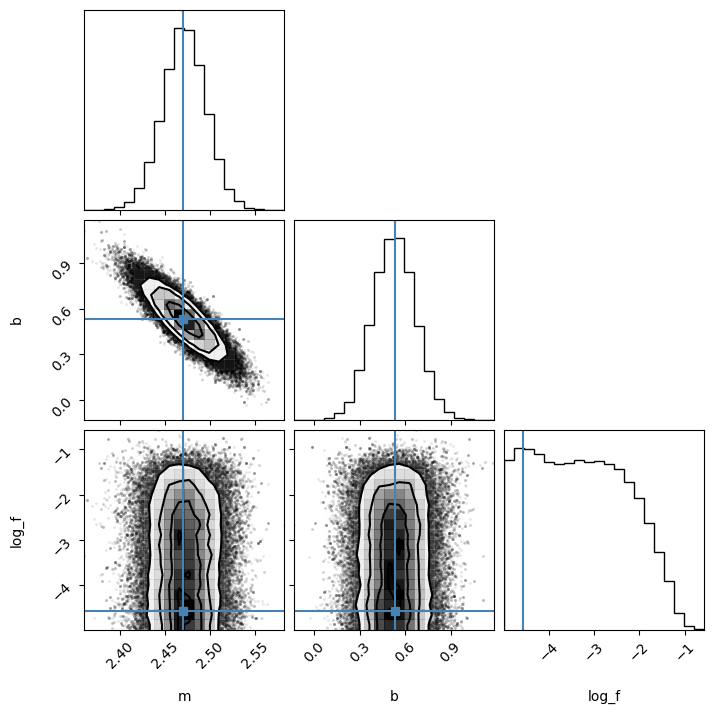

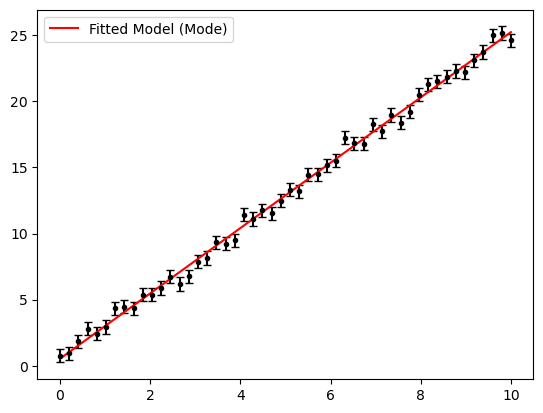

In [22]:
import numpy as np
import emcee
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import corner

# 模拟实验数据
np.random.seed(42)  # 设置随机种子以保证结果可复现
true_m = 2.5  # 实际的斜率
true_b = 0.5  # 实际的截距
x_data = np.linspace(0, 10, 50)  # x的范围
y_true = true_m * x_data + true_b  # 真实模型的y值
y_error = 0.5  # 假设观测误差的标准差
y_data = y_true + np.random.normal(0, y_error, size=x_data.shape)  # 加入噪声的观测值

# 定义待拟合的线性模型 y = m * x + b
def model(x, m, b):
    return m * x + b

# 定义似然函数，假设观测误差服从正态分布
def log_likelihood(theta, x, y, yerr):
    m, b, log_f = theta
    model_y = model(x, m, b)
    sigma2 = yerr**2 + np.exp(2*log_f)
    return -0.5 * np.sum((y - model_y)**2 / sigma2 + np.log(sigma2))

# 定义先验分布
def log_prior(theta):
    m, b, log_f = theta
    if -10 < m < 10 and -10 < b < 10 and -5 < log_f < 0:
        return 0.0
    return -np.inf

# 定义后验概率函数
def log_posterior(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)

# MCMC 设置
nwalkers = 32  # 采样链的数量
ndim = 3       # 参数维数 (m, b, log_f)
p0 = np.random.randn(nwalkers, ndim)  # 初始点

# 运行采样
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(x_data, y_data, y_error))
sampler.run_mcmc(p0, 5000)  # 5000步的采样

# 提取结果并进行分析
samples = sampler.chain[:, 1000:, :].reshape((-1, ndim))  # 丢弃前1000步的烧入(burn-in)

# 定义计算众数的函数，使用KDE
def compute_mode(samples):
    kde = gaussian_kde(samples)
    x = np.linspace(min(samples), max(samples), 1000)  # 生成范围内的点
    kde_values = kde(x)  # 计算这些点的密度估计值
    mode_index = np.argmax(kde_values)  # 找到最大值的索引
    return x[mode_index]  # 返回众数

# 计算每个参数的众数
m_mode = compute_mode(samples[:, 0])  # m的众数
b_mode = compute_mode(samples[:, 1])  # b的众数
log_f_mode = compute_mode(samples[:, 2])  # log_f的众数

print(f"m 的众数为: {m_mode:.2f}")
print(f"b 的众数为: {b_mode:.2f}")
print(f"log_f 的众数为: {log_f_mode:.2f}")

# 绘制corner图来检查后验分布
corner.corner(samples, labels=["m", "b", "log_f"], truths=[m_mode, b_mode, log_f_mode])
plt.show()

# 用众数作为模型参数进行拟合和预测
m_fit = m_mode
b_fit = b_mode

# 可视化拟合结果
plt.errorbar(x_data, y_data, yerr=y_error, fmt=".k", capsize=3)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = model(x_fit, m_fit, b_fit)
plt.plot(x_fit, y_fit, color="r", label="Fitted Model (Mode)")
plt.legend()
plt.show()
